In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv(r'C:\Users\nafri\Downloads\Diwali Sales Data.csv', encoding='unicode_escape')


In [7]:
df.shape

(11251, 15)

In [9]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [13]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [15]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [17]:
# drop null values
df.dropna(inplace=True)
# change data type
df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int32')

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [21]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [23]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


Exploratory Data Analysis

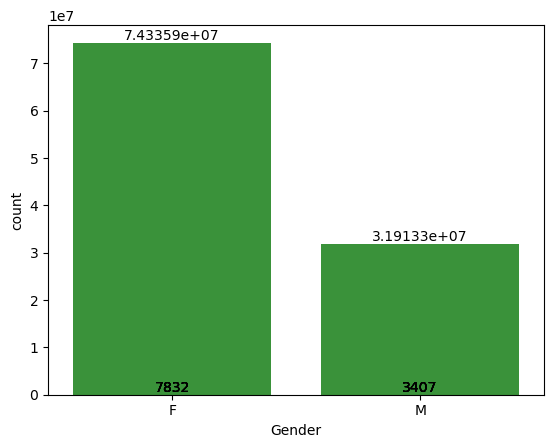

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# plotting a bar chart for Gender and its count
ax = sns.countplot(x='Gender', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


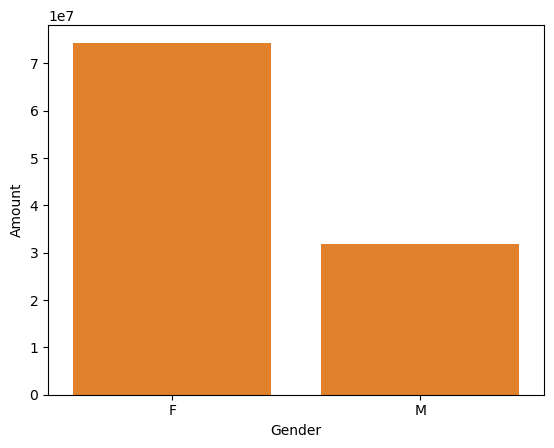

In [40]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

plt.show()

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

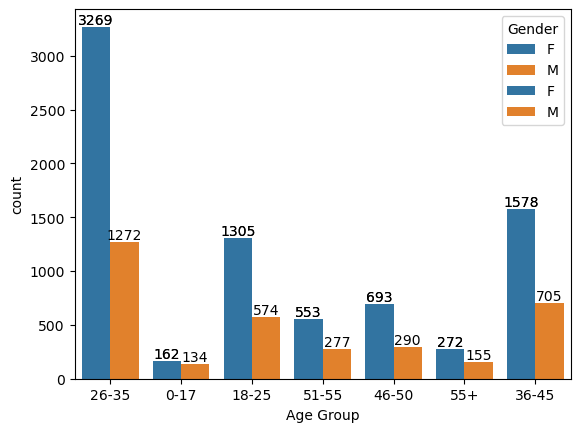

In [45]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)
    plt.show()

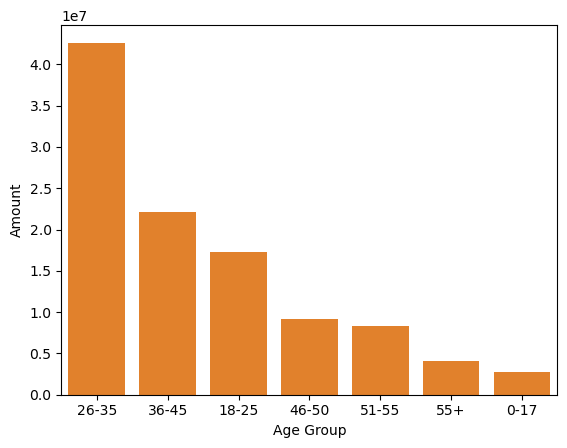

In [49]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)
plt.show()

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

**State**

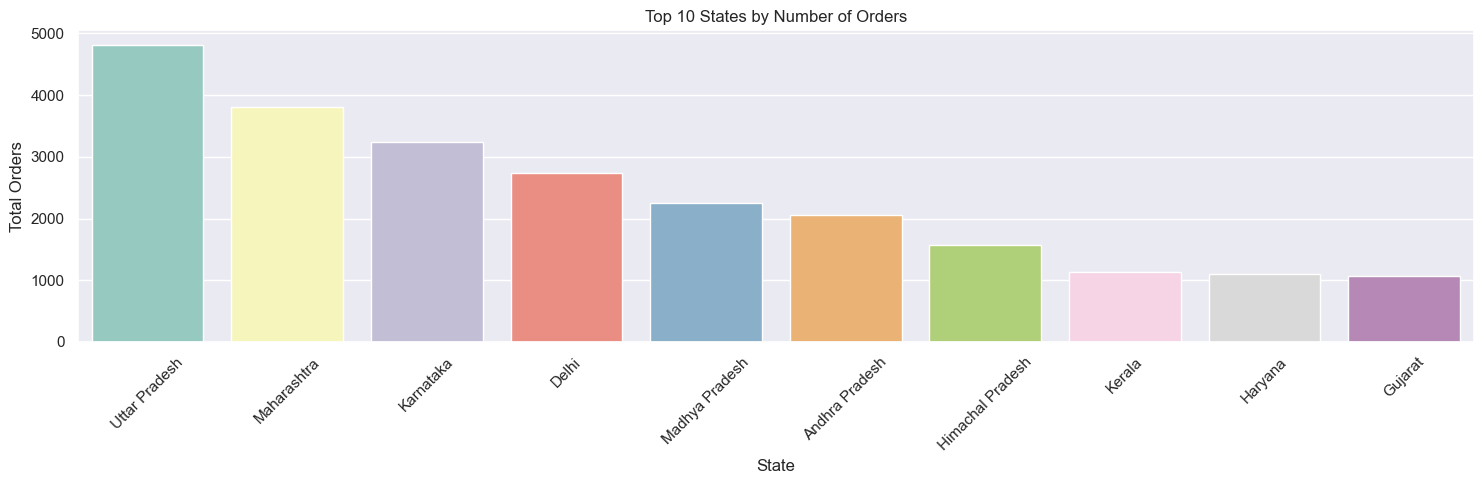

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and sort data
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

# Plot with color palette using `hue`
sns.set(rc={'figure.figsize': (15, 5)})

# Assign x to hue and disable the legend to avoid clutter
sns.barplot(data=sales_state, x='State', y='Orders', hue='State', palette='Set3', dodge=False, legend=False)

plt.title("Top 10 States by Number of Orders")
plt.xlabel("State")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

**Marital Status**

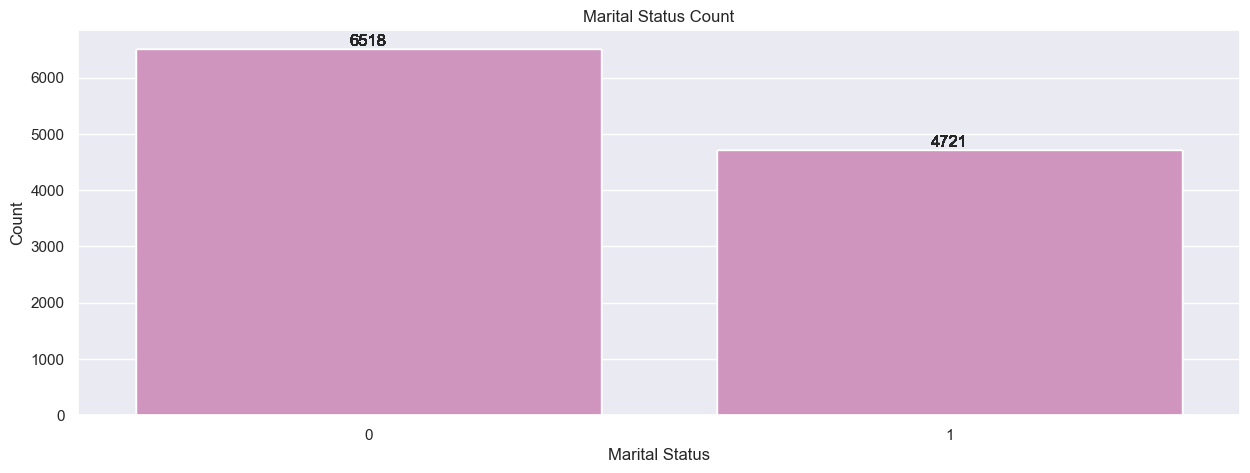

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size BEFORE plotting
sns.set(rc={'figure.figsize': (7, 5)})

# Create the plot
ax = sns.countplot(data=df, x='Marital_Status')

# Add value labels
for bars in ax.containers:
    ax.bar_label(bars)

# Show the plot
plt.title("Marital Status Count")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()


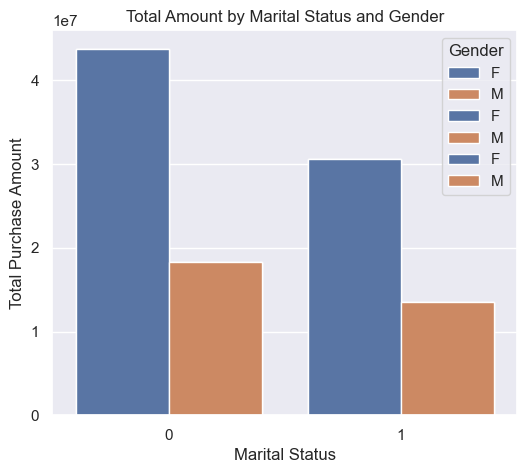

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping data
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Set figure size
sns.set(rc={'figure.figsize': (6, 5)})

# Plotting bar chart
sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender')

# Display the plot
plt.title("Total Amount by Marital Status and Gender")
plt.xlabel("Marital Status")
plt.ylabel("Total Purchase Amount")
plt.show()  # <-- missing parentheses was the issue


From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

**Occupation**

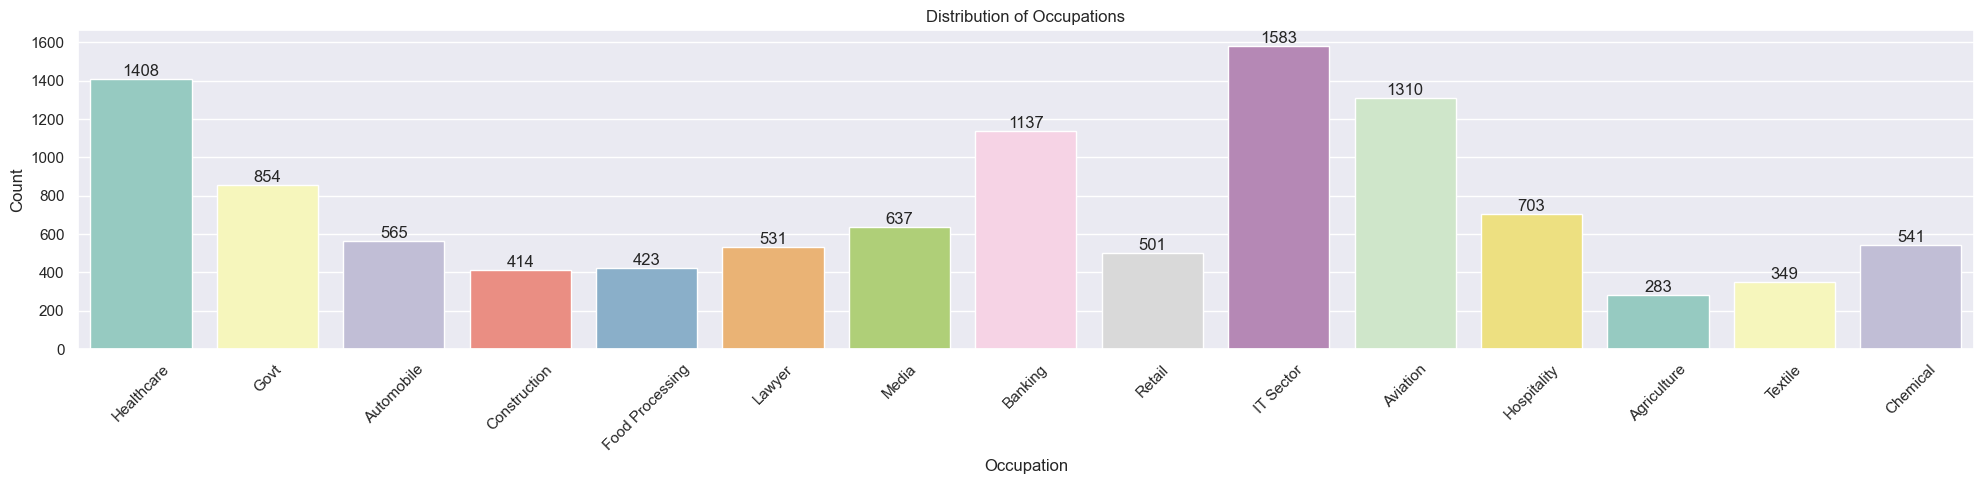

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (20, 5)})

# Assign `x` to `hue`, disable legend to avoid redundancy
ax = sns.countplot(data=df, x='Occupation', hue='Occupation', palette='Set3', dodge=False, legend=False)

# Add value labels
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Distribution of Occupations")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


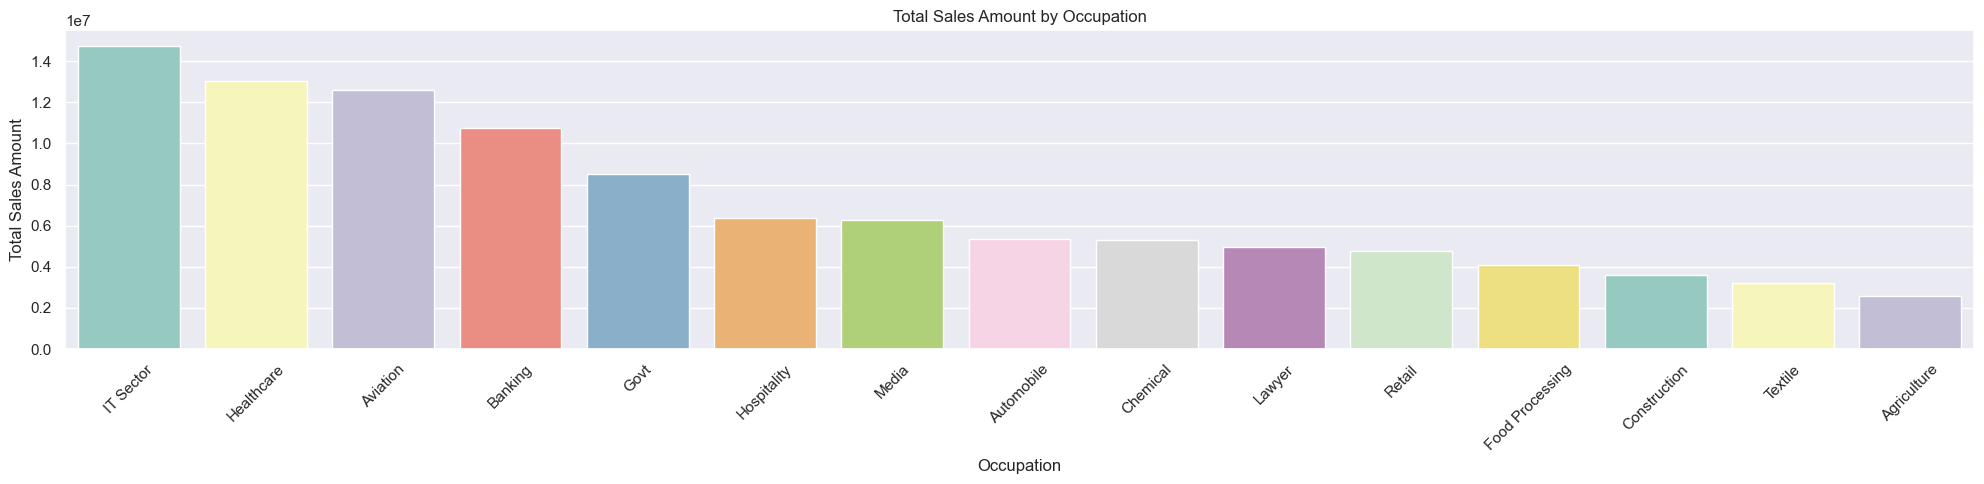

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by Occupation and summing 'Amount'
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Set figure size
sns.set(rc={'figure.figsize': (20, 5)})

# Plot with hue='Occupation' to prevent future warnings
sns.barplot(data=sales_state, x='Occupation', y='Amount', hue='Occupation', palette='Set3', dodge=False, legend=False)

# Display the plot
plt.title("Total Sales Amount by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Product Category**

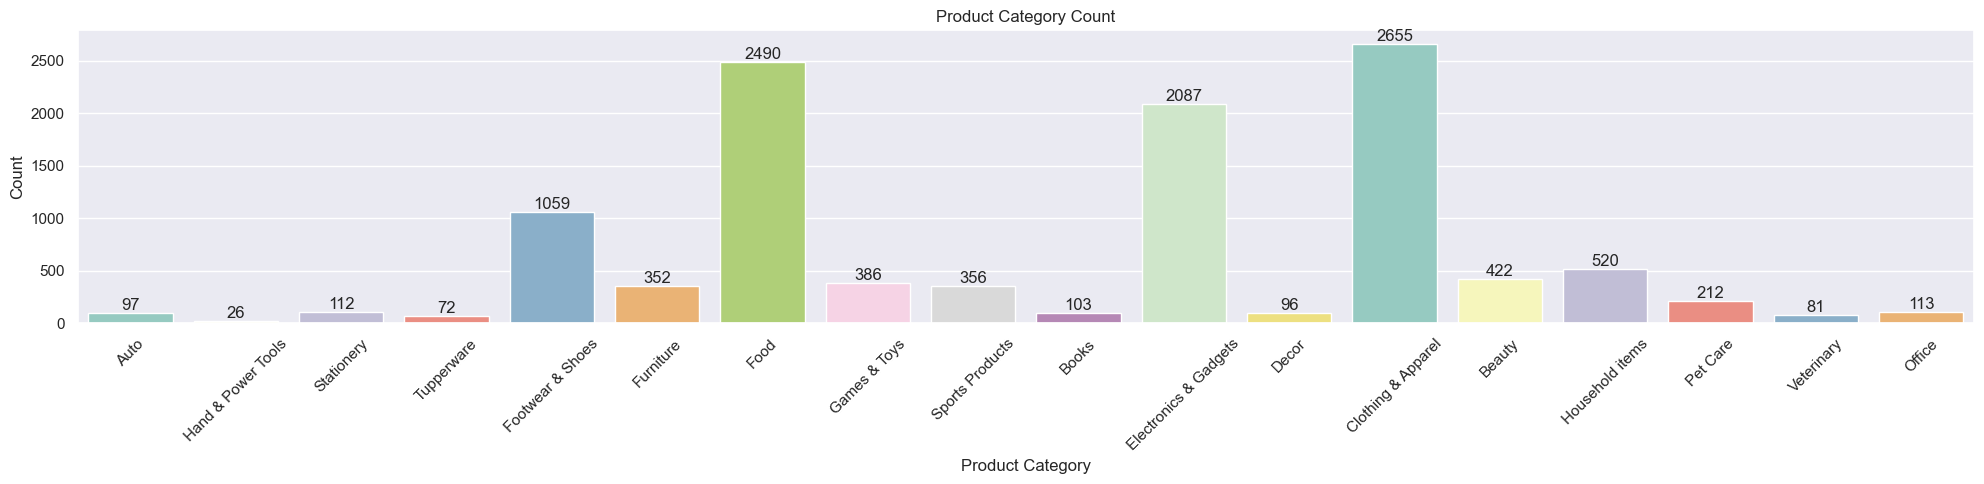

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
sns.set(rc={'figure.figsize': (20, 5)})

# Create countplot with hue and palette
ax = sns.countplot(data=df, x='Product_Category', hue='Product_Category', palette='Set3', dodge=False, legend=False)

# Add bar labels
for bars in ax.containers:
    ax.bar_label(bars)

# Display the plot
plt.title("Product Category Count")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


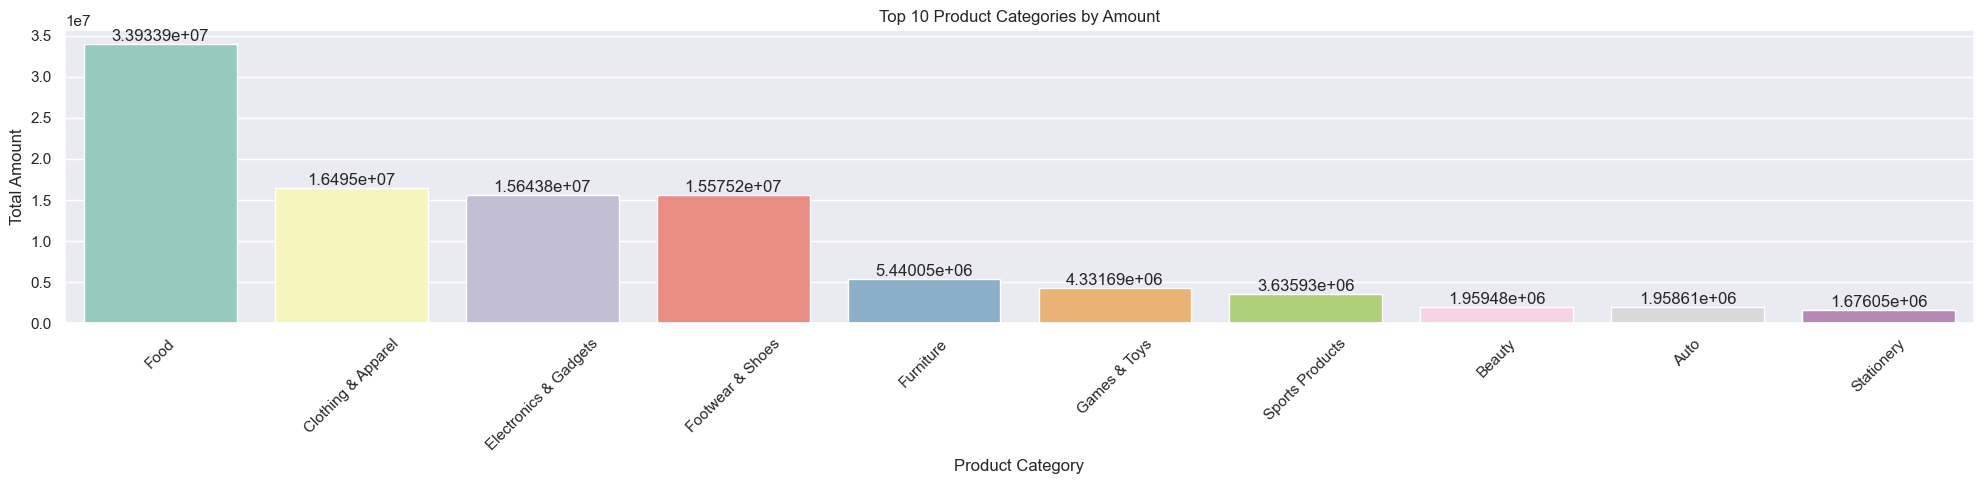

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by Product_Category and summing 'Amount'
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

# Set figure size
sns.set(rc={'figure.figsize': (20, 5)})

# Create barplot with hue for color differentiation
ax = sns.barplot(data=sales_state, x='Product_Category', y='Amount', hue='Product_Category', palette='Set3', dodge=False, legend=False)

# Add bar labels
for bars in ax.containers:
    ax.bar_label(bars)

# Display the plot
plt.title("Top 10 Product Categories by Amount")
plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Ensure everything fits
plt.show()


From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

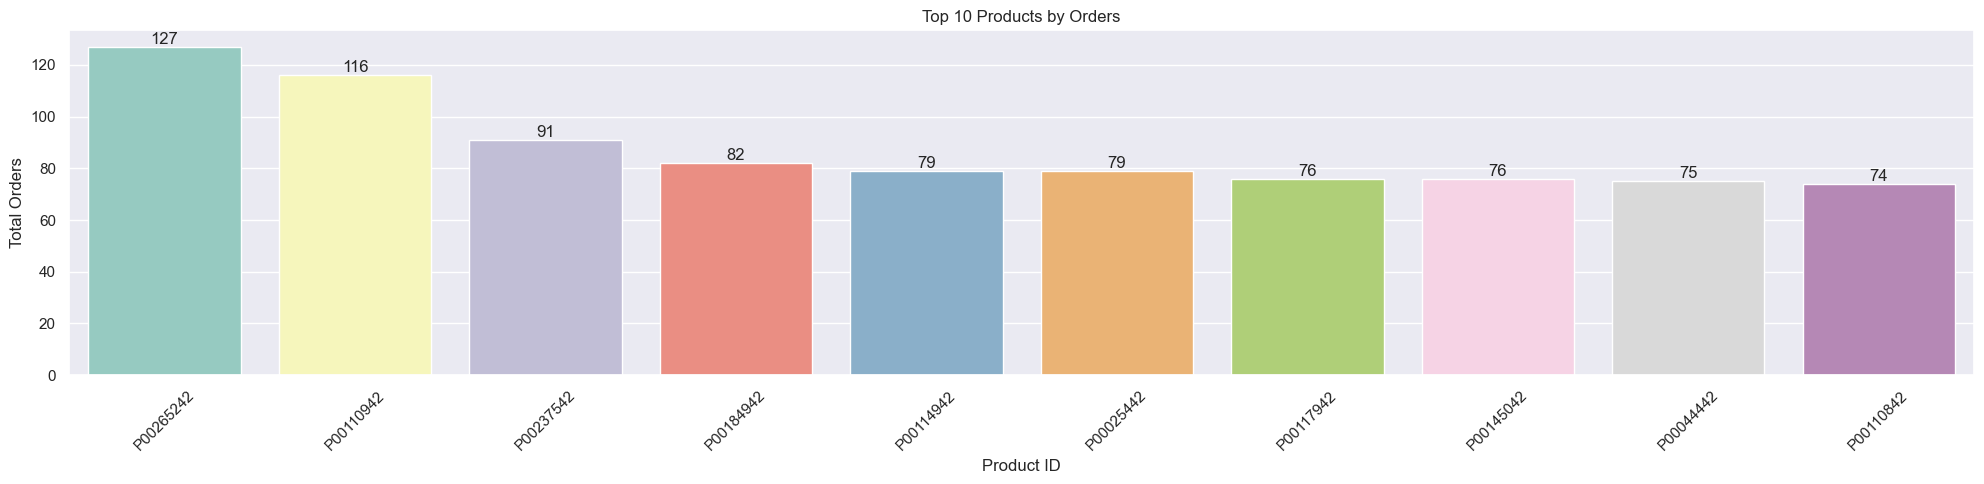

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by Product_ID and summing 'Orders'
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

# Set figure size
sns.set(rc={'figure.figsize': (20, 5)})

# Create barplot with hue for color differentiation
ax = sns.barplot(data=sales_state, x='Product_ID', y='Orders', hue='Product_ID', palette='Set3', dodge=False, legend=False)

# Add bar labels
for bars in ax.containers:
    ax.bar_label(bars)

# Display the plot
plt.title("Top 10 Products by Orders")
plt.xlabel("Product ID")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Ensure everything fits
plt.show()


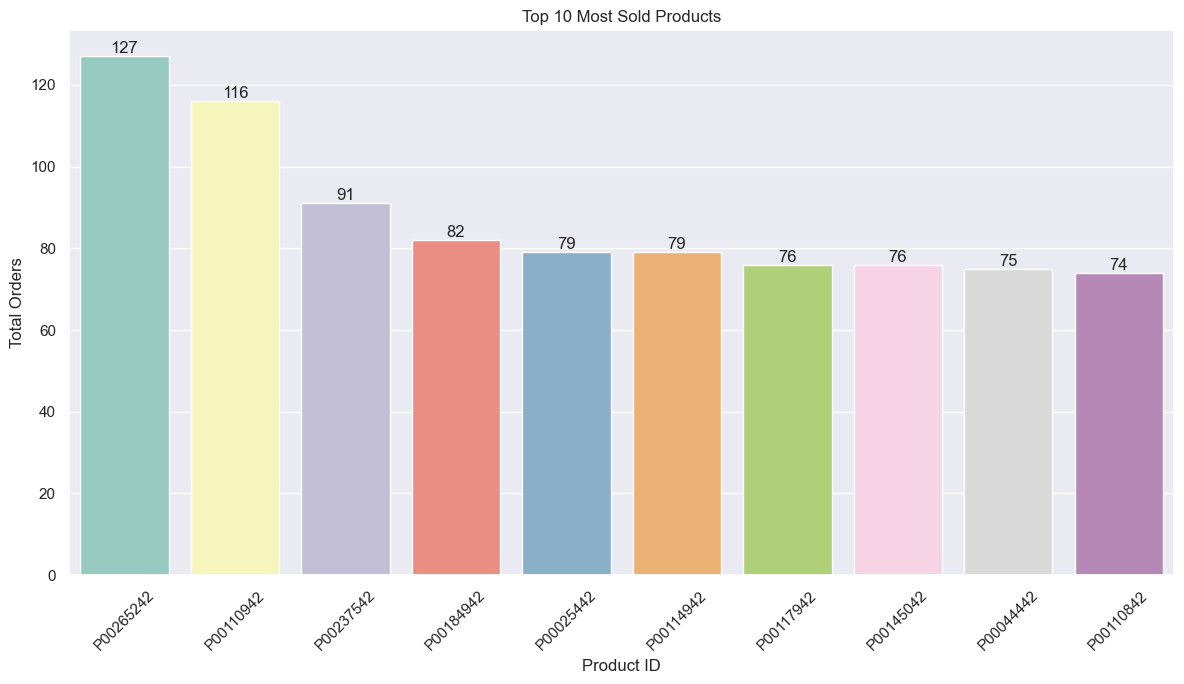

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by Product_ID and summing 'Orders' to get the top 10 most sold products
top_10_products = df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False)

# Create figure and axis
fig1, ax1 = plt.subplots(figsize=(12, 7))

# Create barplot using Seaborn with hue for color mapping (avoiding FutureWarning)
sns.barplot(x=top_10_products.index, y=top_10_products.values, hue=top_10_products.index, palette='Set3', ax=ax1, dodge=False)

# Add labels on top of bars
for bars in ax1.containers:
    ax1.bar_label(bars)

# Title and labels
ax1.set_title('Top 10 Most Sold Products')
ax1.set_xlabel('Product ID')
ax1.set_ylabel('Total Orders')

# Set xticks and rotate labels to avoid the UserWarning
ax1.set_xticks(range(len(top_10_products)))
ax1.set_xticklabels(top_10_products.index, rotation=45)

# Show plot
plt.tight_layout()  # Ensure everything fits in the plot
plt.show()


**Conclusion:**
Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category